For my coding sample, I will use this case study I did several months ago. The objective was to take real estate data and devise a method to accurately predict rental prices. 

In [116]:
#Let's import some packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import seaborn as sns

In [117]:
#Let's load the data
train_data = pd.read_csv("TrainingSet.csv")

#Get the dimensions
print(train_data.shape)

#Print the first few rows to see what we're working with
print(train_data.head())

#Print the data types for each column
print(train_data.dtypes)

#Let's describe the data
print(train_data.describe())

(274075, 8)
  Close Date  Close Price   Latitude  Longitude  Bedrooms  Bathrooms  \
0  12/2/2023       4800.0  26.257621 -81.711571         4        3.0   
1  12/2/2023       3700.0  34.041742 -84.044686         5        6.0   
2  12/2/2023       2400.0  33.205474 -96.664503         4        2.0   
3  12/2/2023       1770.0  27.756995 -82.648477         3        1.0   
4  12/2/2023       1995.0  32.627490 -97.328963         3        2.0   

   Square Feet  Year Built  
0         2259        2004  
1         2951        2002  
2         1788        2000  
3          944        1955  
4         1360        2010  
Close Date      object
Close Price    float64
Latitude       float64
Longitude      float64
Bedrooms         int64
Bathrooms      float64
Square Feet      int64
Year Built       int64
dtype: object
         Close Price       Latitude      Longitude       Bedrooms  \
count  274075.000000  274075.000000  274075.000000  274075.000000   
mean     2347.445740      31.808253     -95.1

The data types of each variable seem to make sense. At first I thought I had to convert bathrooms to an integer and round up, but according to my friends, it's pretty common to have 0.5 of a bathroom. With some further research on Quora, you can have 0.1 of a bathroom. Thanks to Ziyue's confirmation of the bathrooms as well, the float data type for the column can be left alone.

We will now go through each column one at a time and make sure the data is clean. We will begin with close price:

count    274075.000000
mean       2347.445740
std         816.529811
min         400.000000
25%        1855.000000
50%        2195.000000
75%        2595.000000
max       10000.000000
Name: Close Price, dtype: float64
False


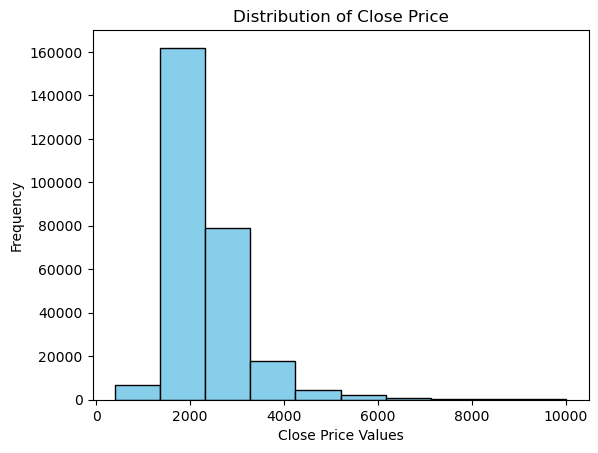

In [118]:
#Let's output the summary and do a very basic histogram
print(train_data["Close Price"].describe())

#Also do a check to see if there are any missing values
print(train_data["Close Price"].isna().any())

#Histogram for close price
plt.hist(train_data["Close Price"], bins=10, color='skyblue', edgecolor='black')

#Labels and Title
plt.xlabel('Close Price Values')
plt.ylabel('Frequency')
plt.title('Distribution of Close Price')

# Show the plot
plt.show()

Overall, Close Price seems to be skewed to the right with a mean of 2347.445740 dollars. We should apply a log transformation to create a more normal distribution:

count    274075.000000
mean          7.714868
std           0.291063
min           5.991465
25%           7.525640
50%           7.693937
75%           7.861342
max           9.210340
Name: Log Close Price, dtype: float64


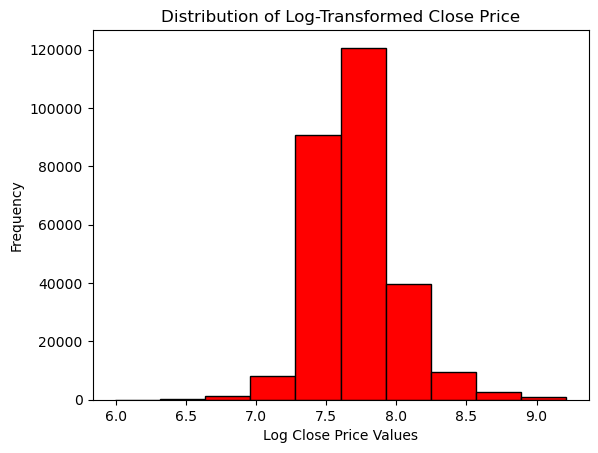

In [119]:
#Create a new column in the data frame with the log transformation of closing price
train_data["Log Close Price"] = np.log(train_data["Close Price"])

#Now we get the summary and plot the distribution
print(train_data["Log Close Price"].describe())
plt.hist(train_data["Log Close Price"], bins=10, color='red', edgecolor='black')

#Labels and Title
plt.xlabel('Log Close Price Values')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Close Price')

# Show the plot
plt.show()

Cool! Now we have a distribution that looks more normally distributed than before. Let's see if it's actually normally distributed with a Q-Q plot:

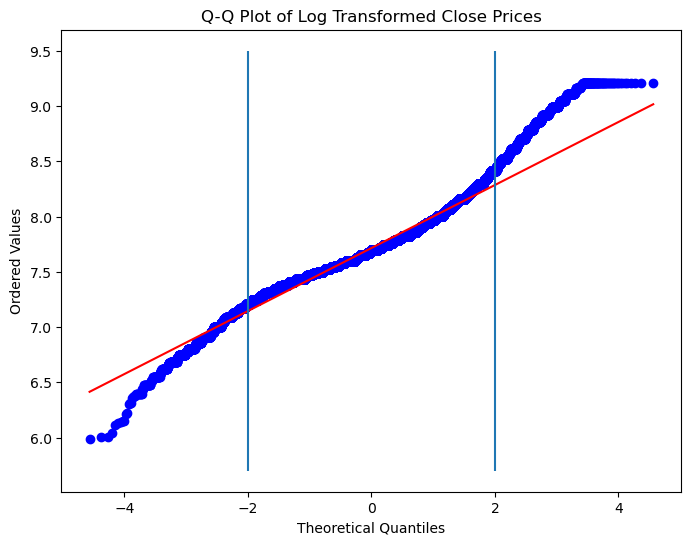

In [120]:
plt.figure(figsize = (8,6))
stats.probplot(train_data["Log Close Price"], dist = "norm", plot = plt)
plt.title("Q-Q Plot of Log Transformed Close Prices")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.vlines(x = [2, -2], ymin = 5.7, ymax = 9.5)
plt.show()

So not completely normally distributed, but for approximately 95% of the data, the normal distribution is followed. Note that for the lower values, they are less than expected and the higher values are higher than expected. Now that we've looked over Close Price, we can look at longitude and latitude. Let's get their summaries:

In [121]:
print(train_data["Latitude"].describe())
print(train_data["Longitude"].describe())

#Also do a check to see if there are any missing values
print(train_data["Latitude"].isna().any())
print(train_data["Longitude"].isna().any())

count    274075.000000
mean         31.808253
std           2.910126
min          25.401486
25%          29.699736
50%          32.783415
75%          33.647606
max          40.365943
Name: Latitude, dtype: float64
count    274075.000000
mean        -95.105780
std          11.778017
min        -115.410772
25%         -97.404022
50%         -95.604447
75%         -82.782850
max         -79.716759
Name: Longitude, dtype: float64
False
False


The values seem to be reasonable and there are no missing values or any NAs. For fun, let's create a spatial plot to visualize where exactly these rentals are:

In [122]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

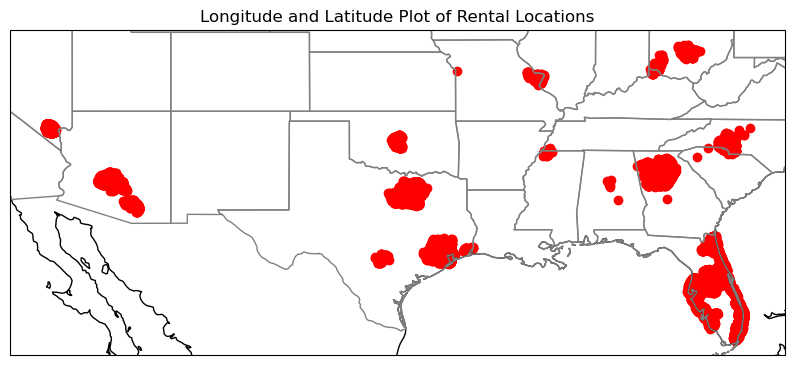

In [123]:
#Now we create the plot
plt.figure(figsize=(10, 6))

# Create a map 
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and state lines
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='gray')

#Plot the rental locations
plt.scatter(train_data["Longitude"], train_data["Latitude"], color='red', marker='o', transform=ccrs.PlateCarree())

# Add title
plt.title("Longitude and Latitude Plot of Rental Locations")

# Show the plot
plt.show()

So we see properties in Nevada, Arizona, Texas, Oklahoma, Mississippi, Tennessee, Missouri, Illinois, Indiana, Ohio, Kentucky, North Carolina, South Carolina, Georgia, Florida, and Alabama. 

Let's take a look at the Bathrooms variable:

count    274075.000000
mean          2.374001
std           0.833122
min           0.100000
25%           2.000000
50%           2.000000
75%           3.000000
max         205.000000
Name: Bathrooms, dtype: float64
False


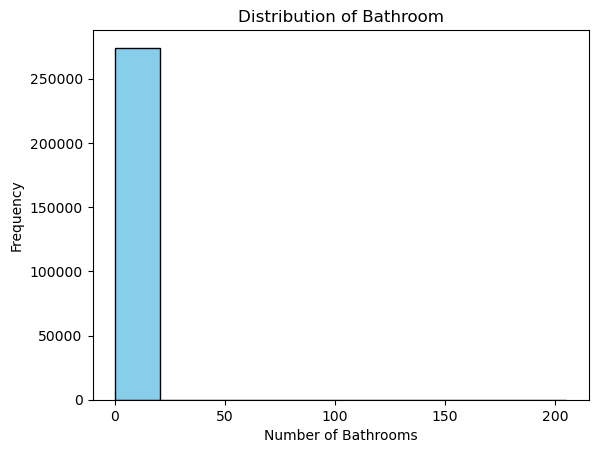

In [124]:
print(train_data["Bathrooms"].describe())
print(train_data["Bathrooms"].isna().any())

#Histogram for bathrooms
plt.hist(train_data["Bathrooms"], bins = 10, color='skyblue', edgecolor='black')

#Labels and Title
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Bathroom')

# Show the plot
plt.show()

We see an outlier at 205 that prevents us from seeing more of the data's distribution.

Let's try to identify the extreme values in the number of bathrooms using the IQR method, where the third quartile is added to 3 times the interquartile range. We see that the two largest entries by far are 71 and 205 bathrooms:

In [125]:
bathSummary = train_data["Bathrooms"].describe()
bathOutlierLine = bathSummary["75%"] + 3 * (bathSummary["75%"] - bathSummary["25%"])

In [126]:
bathroomCondition = train_data["Bathrooms"] > bathOutlierLine
train_data[bathroomCondition]

,Close Date,Close Price,Latitude,Longitude,Bedrooms,Bathrooms,Square Feet,Year Built,Log Close Price
77,12/2/2023,7450.0,40.201631,-83.161426,5,7.0,10993,1940,8.915969
566,12/1/2023,1995.0,35.068301,-80.684854,3,11.0,1880,2002,7.598399
814,12/1/2023,1800.0,36.145427,-115.307545,4,9.0,1625,2013,7.495542
4072,11/20/2023,2370.0,26.657685,-81.994455,4,11.0,1872,2017,7.770645
5198,11/18/2023,5000.0,28.255108,-81.456995,12,12.0,4785,2022,8.517193
...,...,...,...,...,...,...,...,...,...
264990,2/3/2022,5500.0,34.159312,-84.070383,5,7.0,5799,2004,8.612503
269664,1/17/2022,9500.0,25.823272,-80.351061,6,7.0,4126,2015,9.159047
269912,1/17/2022,3000.0,34.016145,-84.138658,3,13.0,3434,2007,8.006368
270464,1/15/2022,8000.0,35.123881,-80.845793,4,7.0,5573,1996,8.987197


If we were to get rid of these rows, we would be getting rid of 203/274075 ~= 0.00074067 or about 0.074067\% of the data. This seems like a reasonable tradeoff to me as in the absence of any other information about the data or the domain, I would delete these rows to have a better distribution of data:

In [127]:
#Filter out the outliers
bathroomCleanCondition = train_data["Bathrooms"] <= bathOutlierLine
train_data = train_data[bathroomCleanCondition]
print(train_data.shape)

(273872, 9)


count    273872.000000
mean          2.367817
std           0.691140
min           0.100000
25%           2.000000
50%           2.000000
75%           3.000000
max           6.000000
Name: Bathrooms, dtype: float64


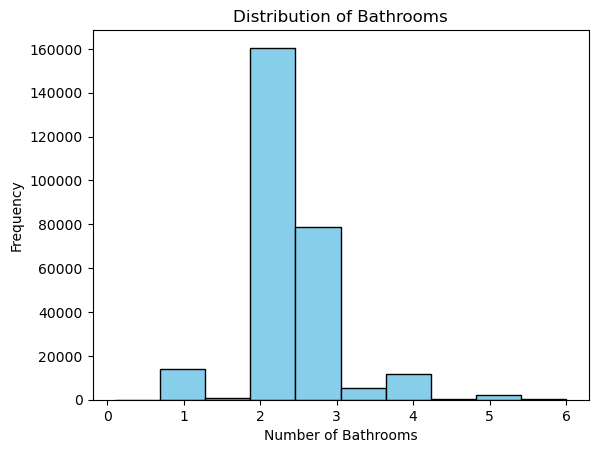

In [128]:
print(train_data["Bathrooms"].describe())

#New histogram for bathrooms
plt.hist(train_data["Bathrooms"], color='skyblue', edgecolor='black')

#Labels and Title
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Bathrooms')

# Show the plot
plt.show()

Now we look at the bedrooms and we see the same problem as with the bathrooms:

count    273872.000000
mean          3.447092
std           0.920284
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max         222.000000
Name: Bedrooms, dtype: float64


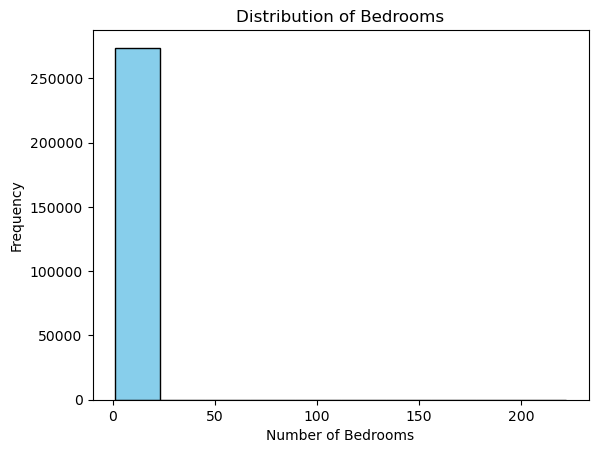

In [129]:
print(train_data["Bedrooms"].describe())

#New histogram for bedrooms
plt.hist(train_data["Bedrooms"], color='skyblue', edgecolor='black')

#Labels and Title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Bedrooms')

# Show the plot
plt.show()

Let's use the IQR definition of outliers in this case as well to filter out the extreme values. We see that there are 131 outliers in the bedroom counts. Again, it seems reasonable to exclude these as they represent a very small percentage of the data:

In [130]:
bedSummary = train_data["Bedrooms"].describe()
bedOutlierLine = bedSummary["75%"] + 3*(bedSummary["75%"] - bedSummary["25%"])
bedroomCondition = train_data["Bedrooms"] > bedOutlierLine
train_data[bedroomCondition]

,Close Date,Close Price,Latitude,Longitude,Bedrooms,Bathrooms,Square Feet,Year Built,Log Close Price
2376,11/26/2023,2500.0,33.064731,-112.007901,9,4.0,3910,2007,7.824046
6768,11/15/2023,1550.0,32.676130,-96.842835,33,2.0,1203,1956,7.346010
10747,11/3/2023,2500.0,33.808971,-112.139275,8,3.0,3305,2004,7.824046
11373,11/2/2023,2995.0,33.515493,-112.300263,8,4.0,4158,2006,8.004700
11723,11/2/2023,3500.0,36.305565,-115.296616,9,5.0,6043,2001,8.160518
...,...,...,...,...,...,...,...,...,...
256283,2/27/2022,3095.0,33.956850,-84.782476,8,6.0,3230,2008,8.037543
257121,2/25/2022,2895.0,33.219194,-111.743683,8,4.0,3759,2012,7.970740
260183,2/16/2022,3400.0,33.251782,-111.843290,8,3.0,3716,2000,8.131531
269764,1/17/2022,2400.0,33.067392,-112.032478,9,4.0,3900,2007,7.783224


In [131]:
#Filter out the outliers
bedroomCleanCondition = train_data["Bedrooms"] <= bedOutlierLine
train_data = train_data[bedroomCleanCondition]
print(train_data.shape)

(273741, 9)


And we see that we now have 273741 entries out of the original 274075 entries, which is 99.88% of the original data. In return, we now have distributions that resemble the normal distribution shape for both bedroom count and bathroom counts:

count    273741.000000
mean          3.442944
std           0.784694
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           7.000000
Name: Bedrooms, dtype: float64


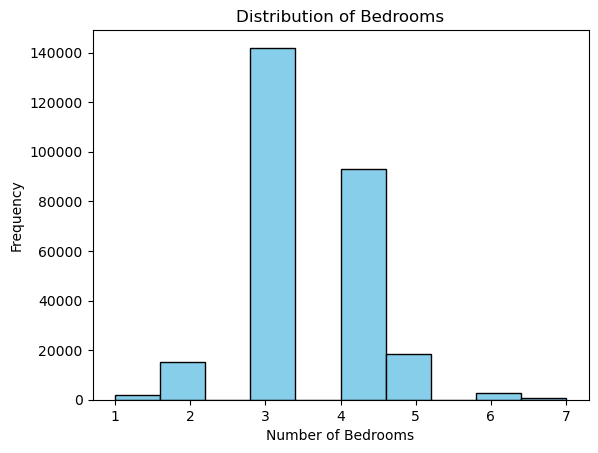

In [132]:
#Plot the new bedroom counts
print(train_data["Bedrooms"].describe())

#Histogram for bedrooms
plt.hist(train_data["Bedrooms"], color='skyblue', edgecolor='black')

#Labels and Title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Bedrooms')

# Show the plot
plt.show()

Let's do some quick scatterplots of bathroom vs. log price and bedroom vs. log price:

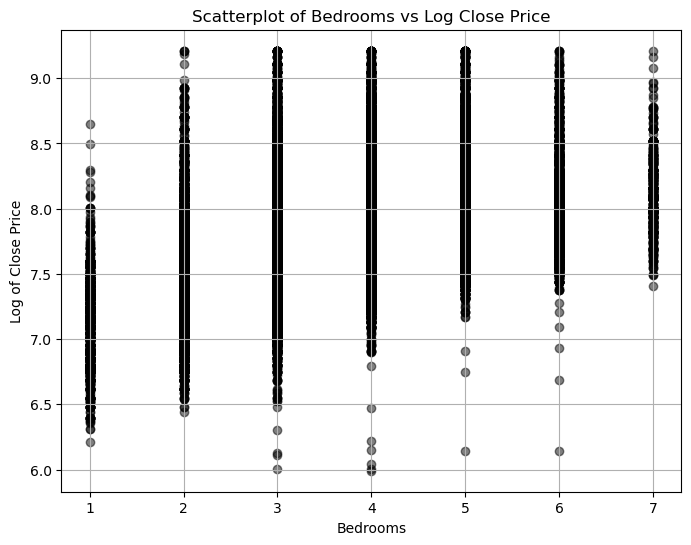

In [133]:
#Plot of log close price vs. bedrooms
plt.figure(figsize = (8,6))
plt.scatter(train_data["Bedrooms"], train_data["Log Close Price"], color = "black", alpha = 0.5)

plt.xlabel("Bedrooms")
plt.ylabel("Log of Close Price")
plt.title("Scatterplot of Bedrooms vs Log Close Price")

plt.grid(True)
plt.show()

We should treat the bedrooms count as a categorical variable based on the scatterplot above. Additionally, we can say that the relationship looks positive and linear. Note how some other data points have been cut off due to our definition of outliers being greater than 7 bedrooms.

Since we are dealing with single family rentals according to the case study description, having a maximum number of bedrooms and bathrooms at 7 and 6 respectively are very reasonable limits. According to USA Facts, 
the average number of people in a single family from 2022 to 2023 has been around 3.1. Thus our IQR method defined-limits to bathroom and bedroom definitely capture the majority of the US population's single families' needs in a home. 

Source: https://usafacts.org/data/topics/people-society/population-and-demographics/population-data/average-family-size/#:~:text=In%202022%2C%20there%20were%20an,a%20family%2C%20unchanged%20from%202021.&text=Census%20Bureau

Let's look at the range of dates. Seems like nothing is wrong:

In [134]:
#Convert the date into date time format
train_data["Close Date"] = pd.to_datetime(train_data["Close Date"])

#Get the earliest date
print("The earliest date is", train_data["Close Date"].min())

#And the latest date
print("The latest date is", train_data["Close Date"].max())

The earliest date is 2022-01-03 00:00:00
The latest date is 2023-12-02 00:00:00


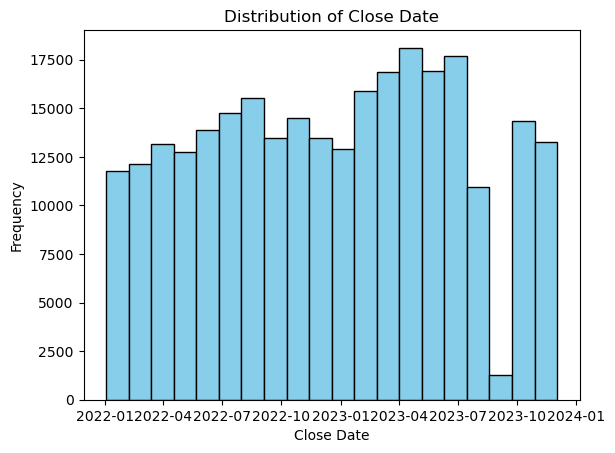

In [135]:
#Histogram for close date
plt.hist(train_data["Close Date"], color='skyblue', bins = 20, edgecolor='black')

#Labels and Title
plt.xlabel('Close Date')
plt.ylabel('Frequency')
plt.title('Distribution of Close Date')

# Show the plot
plt.show()

One interesting observation in the distribution of close dates is the sharp decrease in close dates during September 2023. With a bit of online research, we can see that CNBC's article "Apartment rents are on the verge of declining due to massive new supply" possibly contains insight. According to the article, due to the number of apartment units being built at a 50-year high, renters had more options, thus lowering landlord pricing power. While the data does not support an increase in contract closing, we could be seeing the decrease in contract closing due to renters looking at other properties not tracked by the data or managed by Cerberus.

Source: https://www.cnbc.com/2023/09/08/apartment-rents-on-verge-of-declining-due-to-massive-supply.html

We also see a decrease in the total number of unsold homes according to realtor.com's September 2023 Monthly Housing Market Trends Report. So an increase in home buyers rather than renters could also contribute to the decrease in close dates.

Source: https://www.realtor.com/research/september-2023-data/

Now let's work on square footage:

count    2.737410e+05
mean     2.011375e+03
std      3.301498e+04
min     -3.600000e+01
25%      1.477000e+03
50%      1.808000e+03
75%      2.237000e+03
max      1.244129e+07
Name: Square Feet, dtype: float64
False


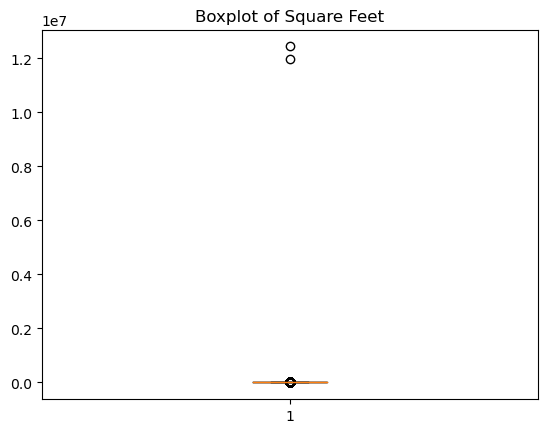

In [136]:
print(train_data["Square Feet"].describe())
print(train_data["Square Feet"].isna().any())

#Histogram for square feet
plt.boxplot(train_data["Square Feet"])

#Labels and Title
plt.title('Boxplot of Square Feet')

# Show the plot
plt.show()

We see a negative value in our data, but it makes no sense to have a negative amount of square feet for a property. Let us delete the negative values and any instances of 0. We end up deleting only 11 entries which is a very small amount of data:

In [137]:
print("Before getting rid of negative values:", train_data.shape)

posSqFtCond = train_data["Square Feet"] > 0
train_data = train_data[posSqFtCond]

print("After:", train_data.shape)
print(train_data["Square Feet"].describe())

Before getting rid of negative values: (273741, 9)
After: (273730, 9)
count    2.737300e+05
mean     2.011457e+03
std      3.301564e+04
min      1.000000e+00
25%      1.477000e+03
50%      1.808000e+03
75%      2.237000e+03
max      1.244129e+07
Name: Square Feet, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x18d1435d0>,
 'caps': [<matplotlib.lines.Line2D at 0x190451ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1904501d0>],
 'medians': [<matplotlib.lines.Line2D at 0x190453150>],
 'fliers': [<matplotlib.lines.Line2D at 0x18d7d3910>],
 'means': []}

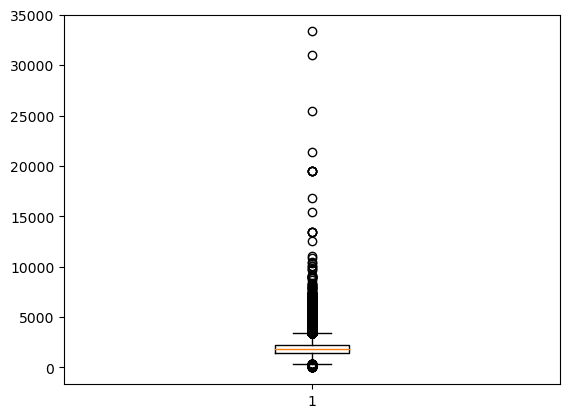

In [138]:
#Let's get rid of the two obvious outliers
sqOutlier = train_data["Square Feet"] < 1.0e+07
train_data = train_data[sqOutlier]
plt.boxplot(train_data["Square Feet"])

While we now see more of a distribution, there still are a lot of outliers with larger square areas than the mean. Let's look at them using the IQR method of outlier identification:

In [139]:
spaceSummary = train_data["Square Feet"].describe()
spaceOutlierLine = spaceSummary["25%"] + 3*(spaceSummary["75%"] - spaceSummary["25%"])
spaceCondition = train_data["Square Feet"] > spaceOutlierLine
train_data[spaceCondition]

,Close Date,Close Price,Latitude,Longitude,Bedrooms,Bathrooms,Square Feet,Year Built,Log Close Price
45,2023-12-02,3995.0,32.993844,-96.560020,5,4.0,3841,2011,8.292799
80,2023-12-02,3499.0,33.824415,-84.121052,6,6.0,4482,1983,8.160232
187,2023-12-02,3500.0,29.568850,-95.642678,5,4.0,3819,2007,8.160518
329,2023-12-02,3800.0,33.105784,-97.046751,4,5.0,3985,2008,8.242756
339,2023-12-02,3665.0,32.826983,-96.590642,5,4.0,4316,2014,8.206584
...,...,...,...,...,...,...,...,...,...
273737,2022-01-03,3500.0,33.229233,-96.804765,4,4.0,3838,2015,8.160518
273785,2022-01-03,8500.0,28.571812,-81.379227,4,4.0,4187,1951,9.047821
273993,2022-01-03,4300.0,33.329371,-111.996834,7,3.0,4682,2011,8.366370
274039,2022-01-03,4000.0,34.034113,-84.509911,5,4.0,5252,2003,8.294050


Now we run into a problem, there are 1224 rows of outliers according to our method of identification and some of them seem very reasonable. For example, take the first row we have shown above with 5451 square feet with 7 bedrooms and 6 bathrooms. In order to decrease the range of values further, let's apply a log transformation to square feet:

In [140]:
#Log transform square feet
train_data["Log Square Feet"] = np.log(train_data["Square Feet"])

In [141]:
train_data["Log Square Feet"].describe()

count    273728.000000
mean          7.505554
std           0.334690
min           0.000000
25%           7.297768
50%           7.499977
75%           7.712891
max          10.414543
Name: Log Square Feet, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x190466490>,
 'caps': [<matplotlib.lines.Line2D at 0x19032d850>,
 'boxes': [<matplotlib.lines.Line2D at 0x19032c650>],
 'medians': [<matplotlib.lines.Line2D at 0x19032cd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x190346dd0>],
 'means': []}

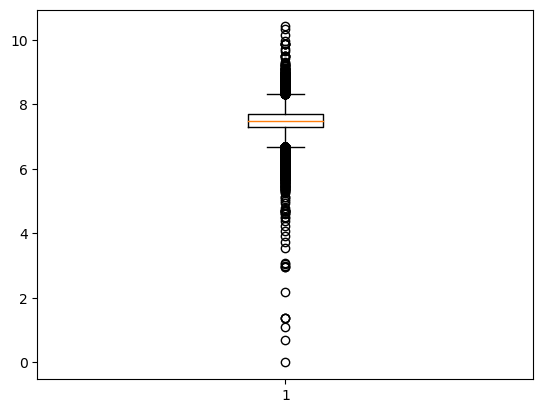

In [142]:
plt.boxplot(train_data["Log Square Feet"])

We now see a less skewed distribution. Let's continue on with both Square Feet and Log Square Feet to see how the inclusion of one or the other affects our analysis methods later.

Finally, let's look at the year built. It is in the integer format and the distribution of the data seems normal. The properties are skewed left and the majority of them were built in the 1990s to 2000s:

count    273728.000000
mean       1996.274506
std          20.537544
min        1800.000000
25%        1985.000000
50%        2002.000000
75%        2011.000000
max        2023.000000
Name: Year Built, dtype: float64
False


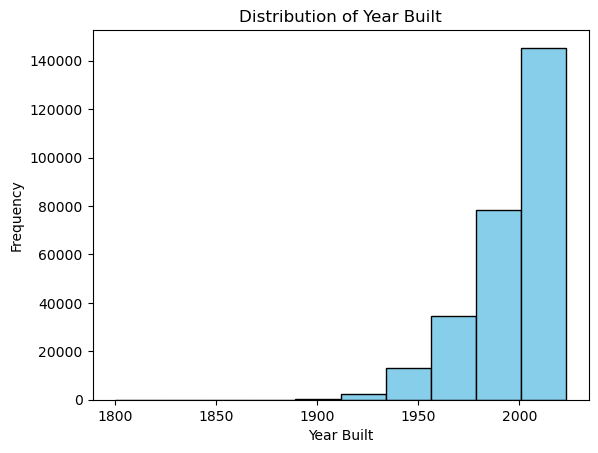

In [143]:
print(train_data["Year Built"].describe())
print(train_data["Year Built"].isna().any())

#Histogram for year built
plt.hist(train_data["Year Built"], bins = 10, color='skyblue', edgecolor='black')

#Labels and Title
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.title('Distribution of Year Built')

# Show the plot
plt.show()

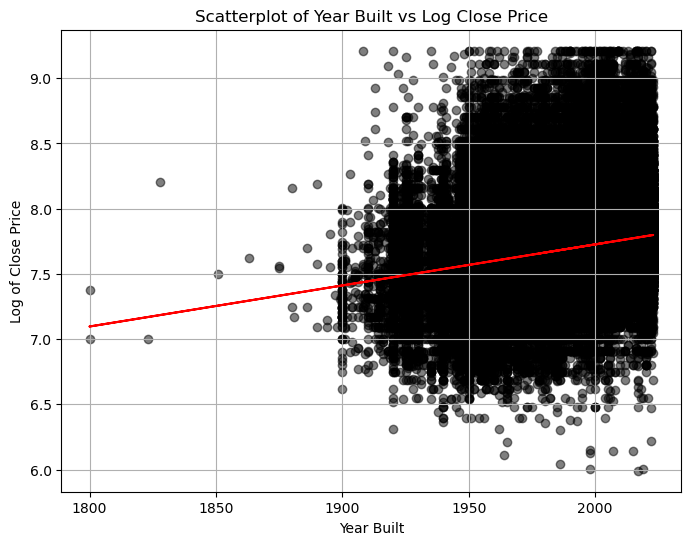

In [144]:
#First we do a plot of log close price vs. year built
plt.figure(figsize = (8,6))
plt.scatter(train_data["Year Built"], train_data["Log Close Price"], color = "black", alpha = 0.5)

slope, intercept = np.polyfit(train_data["Year Built"], train_data["Log Close Price"], 1)
plt.plot(train_data["Year Built"], slope*train_data["Year Built"] + intercept, color='red', label='Linear regression line')

plt.xlabel("Year Built")
plt.ylabel("Log of Close Price")
plt.title("Scatterplot of Year Built vs Log Close Price")

plt.grid(True)
plt.show()

In [145]:
yearCond = train_data["Year Built"] == 2023
train_data[yearCond]

,Close Date,Close Price,Latitude,Longitude,Bedrooms,Bathrooms,Square Feet,Year Built,Log Close Price,Log Square Feet
18,2023-12-02,2350.0,32.933979,-97.337921,4,2.0,2223,2023,7.762171,7.706613
39,2023-12-02,1995.0,33.647778,-112.402475,3,2.0,1564,2023,7.598399,7.355002
40,2023-12-02,2190.0,32.951171,-97.387411,4,2.0,1829,2023,7.691657,7.511525
78,2023-12-02,2500.0,29.372468,-81.132398,4,2.0,1850,2023,7.824046,7.522941
103,2023-12-02,2650.0,33.989108,-84.045022,3,3.0,2436,2023,7.882315,7.798113
...,...,...,...,...,...,...,...,...,...,...
126842,2023-01-18,2100.0,35.600431,-81.033006,4,2.0,1764,2023,7.649693,7.475339
129139,2023-01-12,2550.0,39.881355,-82.828306,6,5.0,2807,2023,7.843849,7.939872
144974,2022-12-03,2200.0,28.169393,-81.610505,3,2.0,1640,2023,7.696213,7.402452
153261,2022-11-10,2400.0,28.033694,-82.324949,4,2.0,2184,2023,7.783224,7.688913


However on closer inspection, it seems that there are instances where the year built is after the close date. As an example, take row 153261 where the close date is 2022-11-10 and the year built is 2023. With some consultation from Ziyue, we can view those properties as ones that were to be completed after a tenant signed the lease.

Now let's plot a scatter plot matrix to get a bird's eye view of the continuous variables and their relationships to each other:

In [146]:
train_data_continuous = train_data[["Log Close Price", "Latitude", "Longitude", "Bedrooms", "Bathrooms", "Year Built", "Log Square Feet"]]

Text(0.5, 0.98, 'Scatter Matrix of Variables')

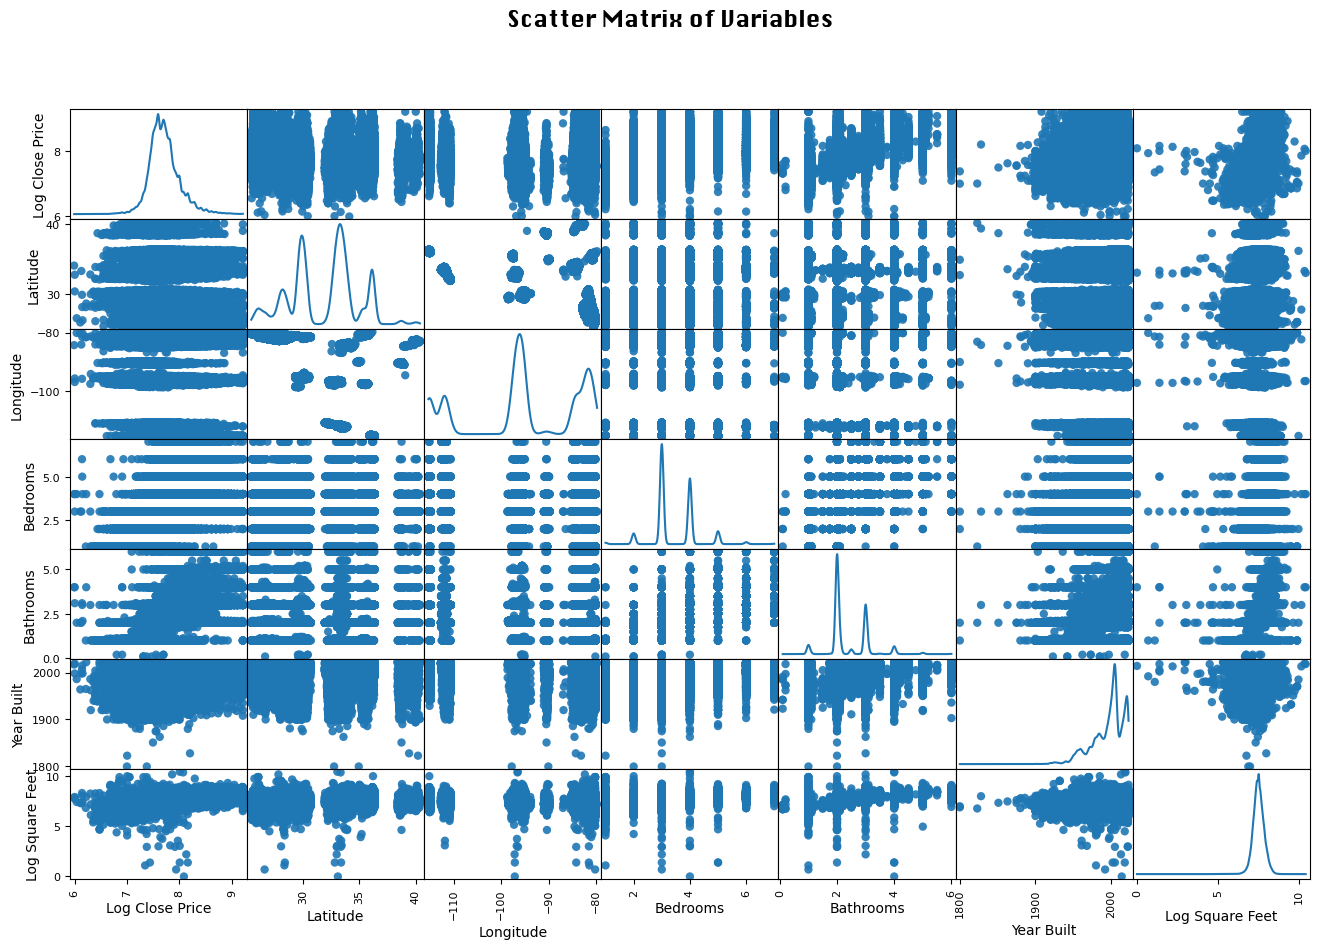

In [147]:
#Plot the scatter plot matrix
scatter_matrix(train_data_continuous, figsize = (16,10),
               alpha = 0.9, diagonal = "kde", marker = "o")

plt.suptitle('Scatter Matrix of Variables', 
          fontsize=16,
          fontname='silom')

From the scatter matrix, we can see that Log Close Price seems to have a positive, linear trend with bedrooms and bathrooms in their scatterplots. Note the distribution of the points in both bedrooms and bathrooms plots suggesting that our variables are categorical instead of continuous. Latitude and Longitude's relationships to Log of Close Price also seems to suggest the presence of different groups in the data. Those groups are most likely due to the specific states/areas where Cerberus typically manages property (such as Texas or Florida). I would add an additional column to the data classifying each entry's state by using its longitudinal and latitudinal values. I believe that creating a categorical variable for the state would definitely increase model performance as rent prices can differ substantially from state to state.

There does seem to be a positive, linear trend between bedrooms and bathrooms which makes sense since more bedrooms implies that more people are living in the home and would thus need more bathrooms. If we are to do a linear regression model, we should only choose either bedrooms or bathrooms to prevent multicollinearity, which would break one of the assumptions of linear regression.

For the next step, let's plot the correlation between the variables to see their relationship:

[Text(0, 0.5, 'Log Close Price'),
 Text(0, 1.5, 'Latitude'),
 Text(0, 2.5, 'Longitude'),
 Text(0, 3.5, 'Bedrooms'),
 Text(0, 4.5, 'Bathrooms'),
 Text(0, 5.5, 'Year Built'),
 Text(0, 6.5, 'Log Square Feet')]

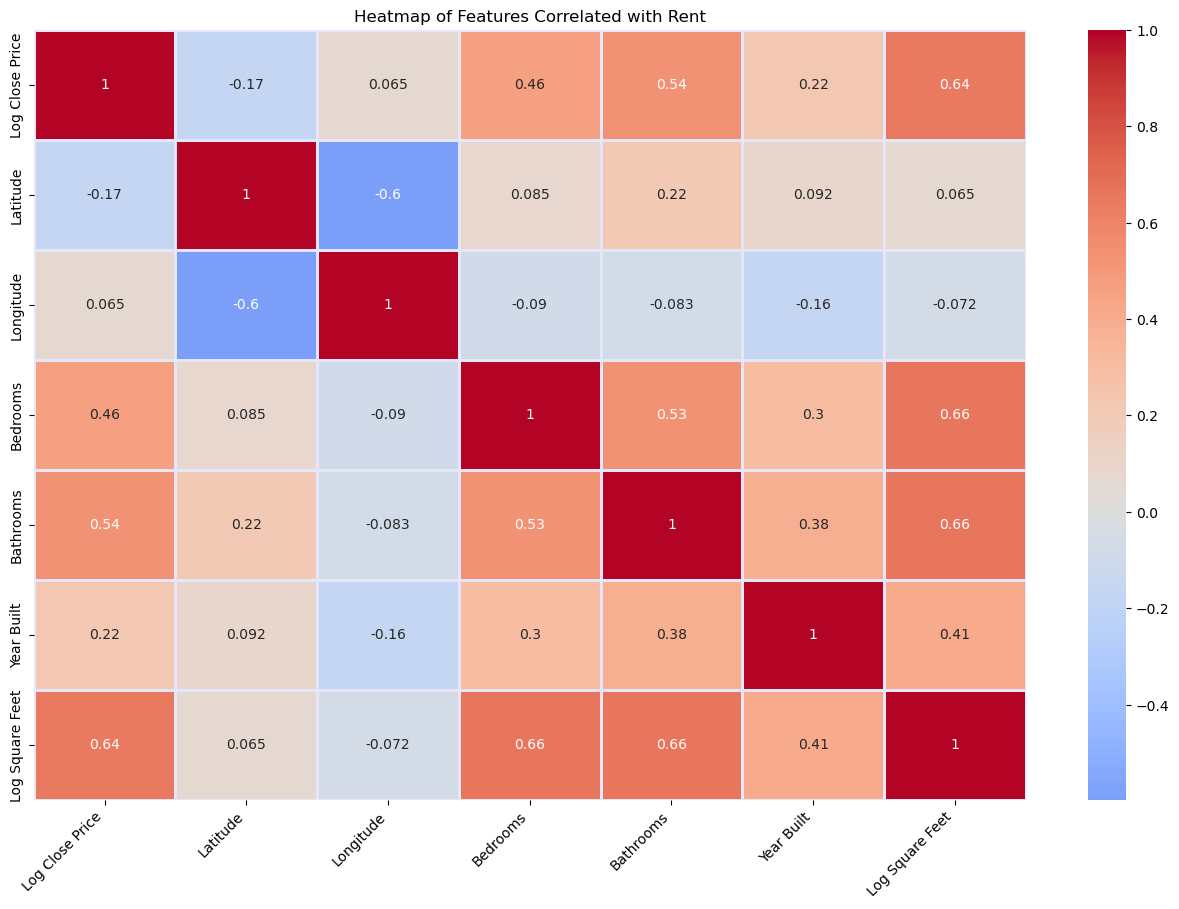

In [148]:
corr = train_data_continuous.corr()

plt.figure(figsize = (16,10))

plt.title("Heatmap of Features Correlated with Rent")
ax = sns.heatmap(corr,
                cmap = "coolwarm",
                center = 0,
                linewidth = 1,
                linecolor = "lavender",
                annot = True
                )

ax.set_xticklabels(ax.get_xticklabels(),
                  rotation = 45,
                  horizontalalignment = "right")

ax.set_yticklabels(ax.get_yticklabels(), 
                  horizontalalignment = "right")

We see the highest correlation with Log Close Price occurs with the Log Square Feet, making it the single best predictor for rental price, followed by bathrooms and then bedrooms.

Let's fit a basic linear regression to create a benchmark for model performance using the pairwise correlation values between the actual values and the ones we predict. First start with Log Square Feet:

In [149]:
#Basic Linear Regression
#Let us use Log Square Feet
X = train_data[["Log Square Feet"]]
y = train_data["Log Close Price"]

# Create a Linear Regression model
linmodel = LinearRegression()

# Fit the model to the data
linmodel.fit(X, y)

# Print the coefficients and intercept
print('Intercept:', linmodel.intercept_)
print('Coefficients:', linmodel.coef_)

train_data["Temp Prediction"] = linmodel.predict(X)

#Measure the correlation
print(train_data["Log Close Price"].corr(train_data["Temp Prediction"]))

Intercept: 3.544239515583417
Coefficients: [0.55558239]
0.6409523218909204


In [150]:
#Let us use Log Square Feet and Bathrooms
X = train_data[["Log Square Feet", "Bathrooms"]]
y = train_data["Log Close Price"]

# Create a Linear Regression model
linmodel = LinearRegression()

# Fit the model to the data
linmodel.fit(X, y)

# Print the coefficients and intercept
print('Intercept:', linmodel.intercept_)
print('Coefficients:', linmodel.coef_)

train_data["Temp Prediction"] = linmodel.predict(X)

#Measure the correlation
print(train_data["Log Close Price"].corr(train_data["Temp Prediction"]))

Intercept: 4.2020734187164335
Coefficients: [0.44159519 0.08352246]
0.6580131473528678


So we only get a marginal increase of about 0.01 when we add bathrooms. Note that when including bedrooms instead of bathrooms, the pairwise correlation value becomes lower. So let's use bathrooms instead of bedrooms to 1) prevent multicollinearity as stated above and 2) to use the variable that increase the correlation value more. Now let's try incorporating latitude and longitude into our models:

In [151]:
#Let us use Log Square Feet, Bathrooms, Latitude, and Longitude
X = train_data[["Log Square Feet", "Bathrooms", "Latitude", "Longitude"]]
y = train_data["Log Close Price"]

# Create a Linear Regression model
linmodel = LinearRegression()

# Fit the model to the data
linmodel.fit(X, y)

# Print the coefficients and intercept
print('Intercept:', linmodel.intercept_)
print('Coefficients:', linmodel.coef_)

train_data["Temp Prediction"] = linmodel.predict(X)

#Measure the correlation
print(train_data["Log Close Price"].corr(train_data["Temp Prediction"]))

Intercept: 5.194393610359246
Coefficients: [ 0.40443586  0.1204093  -0.02896618 -0.0012682 ]
0.705420686353293


In [152]:
#Let us use Log Square Feet, Bathrooms, and Latitude
X = train_data[["Log Square Feet", "Bathrooms", "Latitude"]]
y = train_data["Log Close Price"]

# Create a Linear Regression model
linmodel = LinearRegression()

# Fit the model to the data
linmodel.fit(X, y)

# Print the coefficients and intercept
print('Intercept:', linmodel.intercept_)
print('Coefficients:', linmodel.coef_)

train_data["Temp Prediction"] = linmodel.predict(X)

#Measure the correlation
print(train_data["Log Close Price"].corr(train_data["Temp Prediction"]))

Intercept: 5.18083061223442
Coefficients: [ 0.40975635  0.11755617 -0.02579096]
0.704231921780376


We now have a pairwise-correlation value of about 0.70542, which is better but not amazing. When we leave out Longitude though, we see a small decrease in our correlation value to about 0.704 which implies that Longitude never contributed much to our model. When we include Longitude instead of Latitude, there is a decrease to about 0.6686, so we will keep Latitude in. 

When we add "Year Built", we don't see a substantial increase in our correlation value. The summary has been excluded for brevity. 

For now, using Log Square Feet, Bathrooms, and Latitude as predictor variables will be our baseline model as Latitude and Longitude are decently correlated with each other (-0.6). Consequently, this means that the current model assumes that Latitude has a linear relationship to the Log Close Price, which is not an educated assumption to make. But for the sake of having a linear model, we will continue.

Let's now look a little closer at how each variable in the regression is related to the Log Close Price:

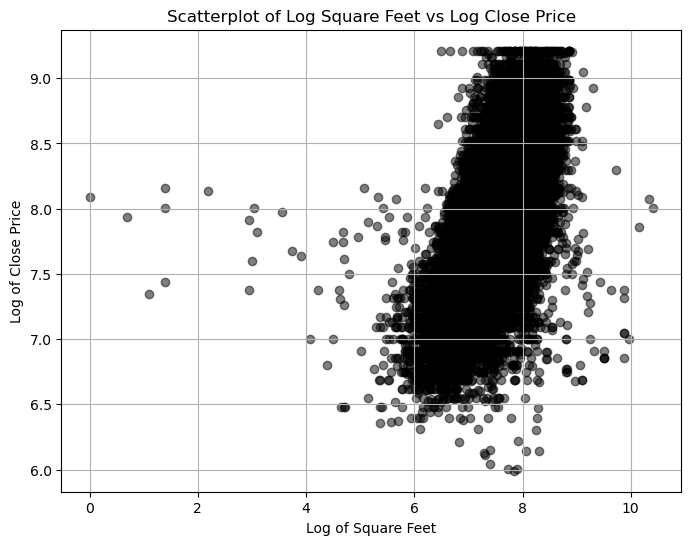

In [153]:
#First we do a plot of Log Close Price vs. Log Square Feet
plt.figure(figsize = (8,6))
plt.scatter(train_data["Log Square Feet"], train_data["Log Close Price"], color = "black", alpha = 0.5)

plt.xlabel("Log of Square Feet")
plt.ylabel("Log of Close Price")
plt.title("Scatterplot of Log Square Feet vs Log Close Price")

plt.grid(True)
plt.show()

There seems to be an almost quadratic relationship between Log Square Feet and Log Close Price. If I had more time, I would try treating Log Square as a quadratic variable and figure out the exponent that would best fit the data, as an exponent of 2 would not work here. Additionally, I would see whether the quadratic variable improves the performance of the pairwise correlation value with the true values in Log Close Price when included in a linear regression with the other variables in the base model.

We know that from our earlier scatterplots, that longitude and latitude do not really say much about the rental property's location. Let's try to reverse geocode the latitude and longitude to get a "State" variable:

In [154]:
from geopy.geocoders import Nominatim

In [155]:
#Intialize the geocoder
geolocator = Nominatim(user_agent = "geoapi_explorer")

In [156]:
#Define a function to get the state
def get_state(latitude, longitude):
    location = geolocator.reverse((latitude, longitude), exactly_one = True)
    address = location.raw['address']
    state = address.get('state', '')
    return state

This function works to get the states for each row, but I left the function running for 40 minutes and it was not able to complete. Below are the first five rows of the data to demonstrate that the code works. If I had more time, I would run the function on the entirety of the data frame to generate the "State" column.

In [157]:
#Create a new column called state
#train_data["State"] = train_data.apply(lambda row: get_state(row["Latitude"], row["Longitude"]), axis = 1)

In [158]:
train_data.head().apply(lambda row: get_state(row["Latitude"], row["Longitude"]), axis = 1)

0    Florida
1    Georgia
2      Texas
3    Florida
4      Texas
dtype: object

Let's look a bit closer at Bedrooms and Bathrooms vs. Log Close Price:

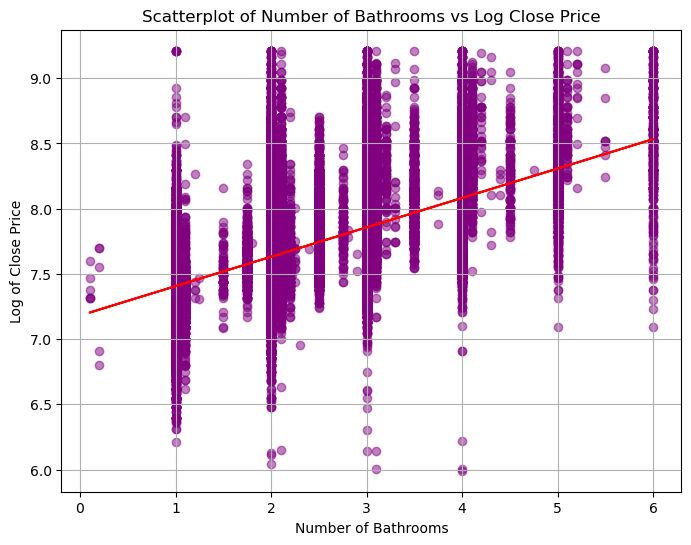

In [159]:
#Plot of log close price vs. bathrooms
plt.figure(figsize = (8,6))
plt.scatter(train_data["Bathrooms"], train_data["Log Close Price"], color = "purple", alpha = 0.5)

slope, intercept = np.polyfit(train_data["Bathrooms"], train_data["Log Close Price"], 1)
plt.plot(train_data["Bathrooms"], slope*train_data["Bathrooms"] + intercept, color='red', label='Linear regression line')

plt.xlabel("Number of Bathrooms")
plt.ylabel("Log of Close Price")
plt.title("Scatterplot of Number of Bathrooms vs Log Close Price")

plt.grid(True)
plt.show()

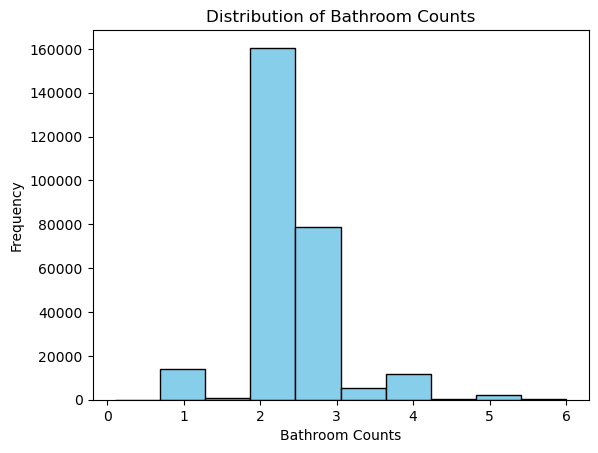

In [160]:
#Histogram for year built
plt.hist(train_data["Bathrooms"], bins = 10, color='skyblue', edgecolor='black')

#Labels and Title
plt.xlabel('Bathroom Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Bathroom Counts')

# Show the plot
plt.show()

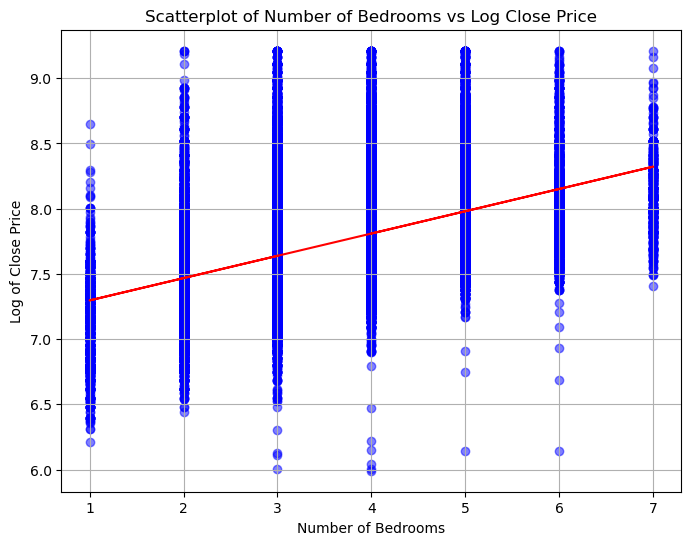

In [161]:
#Plot of Log Close Price vs. Bedrooms
plt.figure(figsize = (8,6))
plt.scatter(train_data["Bedrooms"], train_data["Log Close Price"], color = "blue", alpha = 0.5)

slope, intercept = np.polyfit(train_data["Bedrooms"], train_data["Log Close Price"], 1)
plt.plot(train_data["Bedrooms"], slope*train_data["Bedrooms"] + intercept, color='red', label='Linear regression line')

plt.xlabel("Number of Bedrooms")
plt.ylabel("Log of Close Price")
plt.title("Scatterplot of Number of Bedrooms vs Log Close Price")

plt.grid(True)
plt.show()

While the relationship between both number of bathrooms and the number of bedrooms with log close price appears to be linear, we can visibly see different groups in each of the scatterplots. Let's turn them both into categorical variables. We will first do this for the bedrooms:

In [162]:
temp = train_data

In [163]:
encoded_df = pd.get_dummies(temp["Bedrooms"], prefix = 'Count')

#Concatenate
catData = pd.concat([temp, encoded_df], axis = 1)

In [164]:
#Let us use log square feet, latitude, longitude, and bedroom categories
X = catData[["Log Square Feet", "Count_1", "Count_2", "Count_3", "Count_4", "Count_5", "Count_6", "Count_7", "Latitude", "Longitude"]]
y = catData["Log Close Price"]

# Create a Linear Regression model
linmodel = LinearRegression()

# Fit the model to the data
linmodel.fit(X, y)

# Print the coefficients and intercept
print('Intercept:', linmodel.intercept_)
print('Coefficients:', linmodel.coef_)

train_data["Temp Prediction"] = linmodel.predict(X)

#Measure the correlation
print(train_data["Log Close Price"].corr(train_data["Temp Prediction"]))

Intercept: 4.486989469563836
Coefficients: [ 5.20127681e-01 -2.17434755e-01 -1.99245401e-02 -1.30453047e-02
  4.67920202e-03  6.68331641e-02  8.18038348e-02  9.70883986e-02
 -2.25453561e-02 -4.49665452e-04]
0.6793482597454594


We see no improvement in performance when we treat each bedroom as its own category when we add it to the baseline model instead of "Bedrooms". For bathrooms, we see less defined groups but we will try casting it as a category anyway.

In [165]:
train_data["CatBathrooms"] = train_data["Bathrooms"].astype("category")

In [166]:
#Since there are significantly more variables, we will just cast bathrooms as a category type instead of using a map
train_data["Bathrooms"].unique()

array([3.  , 6.  , 2.  , 1.  , 2.1 , 4.  , 3.5 , 2.5 , 2.2 , 3.1 , 1.1 ,
       5.  , 3.2 , 1.75, 3.75, 4.1 , 2.75, 2.22, 4.5 , 1.5 , 1.25, 4.2 ,
       2.25, 5.1 , 4.4 , 1.2 , 5.2 , 5.5 , 3.3 , 0.1 , 4.3 , 2.9 , 0.2 ,
       1.8 , 2.17, 4.75, 2.8 , 2.3 , 2.4 ])

In [167]:
#Let us use log square feet, latitude, longitude, and bathrooms
X = train_data[["Log Square Feet", "CatBathrooms", "Latitude", "Longitude"]]
y = train_data["Log Close Price"]

# Create a Linear Regression model
linmodel = LinearRegression()

# Fit the model to the data
linmodel.fit(X, y)

# Print the coefficients and intercept
print('Intercept:', linmodel.intercept_)
print('Coefficients:', linmodel.coef_)

train_data["Temp Prediction"] = linmodel.predict(X)

#Measure the correlation
print(train_data["Log Close Price"].corr(train_data["Temp Prediction"]))

Intercept: 5.194393610359246
Coefficients: [ 0.40443586  0.1204093  -0.02896618 -0.0012682 ]
0.705420686353293


It seems that converting the variables into categorical values has no effect on our results which makes sense since the values are exactly the same. I think with more time, I would devise a method of binning the bathrooms to make a categorical variable that is more meaningful than a simple type cast. As of now, turning the variables into categorical values doesn't help much unless we bin them.

In [168]:
#Bringing back our original model
X = train_data[["Log Square Feet", "Bathrooms", "Latitude"]]
y = train_data["Log Close Price"]

# Create a Linear Regression model
linmodel = LinearRegression()

# Fit the model to the data
linmodel.fit(X, y)

# Print the coefficients and intercept
print('Intercept:', linmodel.intercept_)
print('Coefficients:', linmodel.coef_)

train_data["Linear Prediction"] = linmodel.predict(X)

#Measure the correlation
print(train_data["Log Close Price"].corr(train_data["Linear Prediction"]))

Intercept: 5.18083061223442
Coefficients: [ 0.40975635  0.11755617 -0.02579096]
0.704231921780376


In [169]:
#Calculate the residuals
train_data["Residuals"] = train_data["Log Close Price"] - train_data["Linear Prediction"]

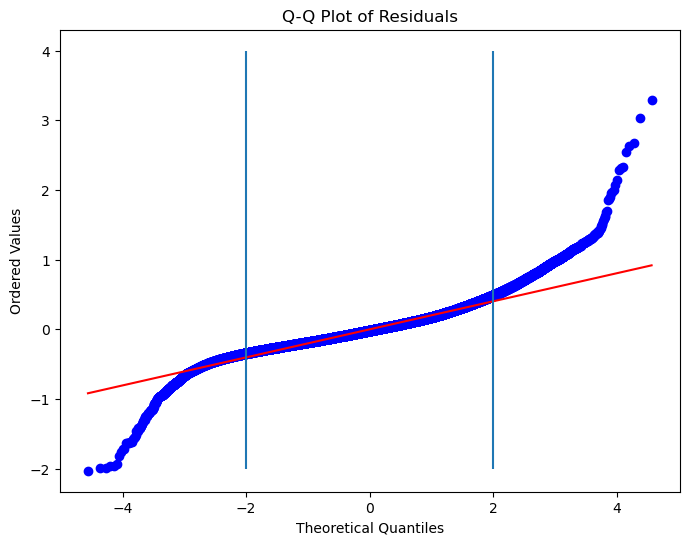

In [170]:
#Create a Q-Q Plot of Residuals
plt.figure(figsize = (8,6))
stats.probplot(train_data["Residuals"], dist = "norm", plot = plt)
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.vlines(x = [2, -2], ymin = -2, ymax = 4)
plt.show()

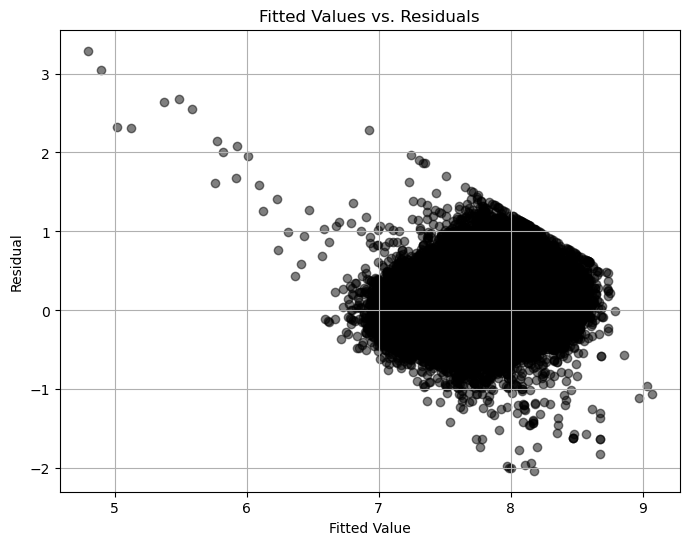

In [171]:
#Plot the fitted values vs. residuals plot 
plt.figure(figsize = (8,6))

plt.scatter(train_data["Linear Prediction"], train_data["Residuals"], color = "black", alpha = 0.5)

plt.xlabel("Fitted Value")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

plt.grid(True)
plt.show()

One method I would do with more time is break down the close date into month, day, and year columns. I would then see if the addition of these categorical variables would improve linear model performance at all when included. After, I would check to see if the variables follow the normal distribution. If they do, I would apply PCA on those three columns to create a variable that describes time. I would then test and see if the inclusion of that time variable instead of the month, day, and year variables would improve model performance. While the interpretability of the PCA component would be difficult, the objective of the task is to best predict the rent price rather than to create a model that best shows how each variable contributes to rent price.

I would also attempt to apply discriminant analysis using the bedrooms or the cities as groups (once the code above to reverse geocode has finished running) to see if there are distinct differences in the Log Close Price between groups. Another analysis I would do is delve more into the Year Built variable and see if there are any interesting trends there.

The main problem with linear regression is that it can be susceptible to extreme outliers. While we have deleted many of the extreme outliers in the data, there are still some instances of points that are not normal. We also don't have perfect normally distributed data, but since this is real world data this is to be expected. Visually, as I have shown above, the histograms for Log Close Price, Bedrooms, Bathrooms, and Log Square Feet resemble a normal distribution shape. From the correlation matrix, we know that our final linear model avoids multicollinearity as we only include Bathrooms and not Bedrooms. Since there is high correlation between Latitude and Longitude, we choose to exclude Longitude from the model. 

From our Q-Q Plot of Residuals above, we can see that the majority of residuals follow a normal distribution. The only instances where they do not are in the extremes, or where about 5% of the data is. We can see that the low extremes are lower than expected and the high extremes are higher than expected. Our fitted values vs. residuals plot is a bit more complicated. Initially, it may seems like the fitted values vs. residuals plot has a decreasing, linear trend. However, this can be explained due to the presence of the outliers on the far left. With the exclusion of those, we can see that the actual fitted values vs. residuals plot is a blob without any specific pattern, suggesting homscedasticity.

Thus, the four assumptions of linear regression: 1) linear relationship with the response variable, 2) independence, 3) homoscedasticity, and 4) normality in residuals hold. 

As a quick note, we choose to use pairwise Pearson correlation as our metric of performance since it is easy to interpret and is a valid measure of "similarity" between our predicted values column and our Log Close Price column. 

In [172]:
#Let's read the current data frame out since this document is long
#and I want to perform the machine learning methods in another notebook

#train_data.to_csv('CleanedTraining.csv', index=False)

In [188]:
#Bringing back our original model
X = train_data[["Log Square Feet", "Bathrooms", "Latitude"]]
y = train_data["Log Close Price"]

# Create a Linear Regression model
finalLinModel = LinearRegression()

# Fit the model to the data
finalLinModel.fit(X, y)

# Print the coefficients and intercept
print('Intercept:', finalLinModel.intercept_)
print('Coefficients:', finalLinModel.coef_)

train_data["Final Linear Prediction"] = finalLinModel.predict(X)

#Measure the correlation
print(train_data["Log Close Price"].corr(train_data["Final Linear Prediction"]))

Intercept: 5.18083061223442
Coefficients: [ 0.40975635  0.11755617 -0.02579096]
0.704231921780376


In [189]:
import joblib

In [190]:
#Let's save the model
joblib.dump(finalLinModel, "CerberusLinModel.pkl")

['CerberusLinModel.pkl']

Now we will write a function that given a Pandas Dataframe with Latitude, Longitude, Bedrooms, Bathrooms, Square Feet, and 
Year Built, will create a calculated Market Rent column:

In [191]:
def calculate_rent(pandasData):
    #We will need to clean the Square Feet by filtering out any negative values or zeros
    positiveCond = pandasData["Square Feet"] > 0
    pandasData = pandasData[positiveCond]

    #We will now convert the Square Feet into a log
    pandasData["Log Square Feet"] = np.log(pandasData["Square Feet"])
    
    #Initialize our X-values
    X = pandasData[["Log Square Feet", "Bathrooms", "Latitude"]]
    
    #Now we load the model
    lin_model = joblib.load("CerberusLinModel.pkl")
    
    #Run the model and create a new column
    pandasData["Market Rent"] = lin_model.predict(X)
    
    #And then we will raise the "Market Rent" column to the e because our model calculates the Log Close Price
    #And also round
    pandasData["Market Rent"] = round(np.exp(pandasData["Market Rent"]))
    
    return pandasData

We will test on the TestSet.csv file.

In [192]:
testing_set = pd.read_csv("TestSet.csv")
new_testing_set = calculate_rent(testing_set)
print(new_testing_set.describe())
print(new_testing_set.isna().any())
new_testing_set

          Latitude    Longitude     Bedrooms    Bathrooms   Square Feet  \
count  9999.000000  9999.000000  9999.000000  9999.000000   9999.000000   
mean     31.694209   -94.603405     3.466447     2.365202   1906.974497   
std       2.996371    11.952605     0.857086     0.701941    703.454244   
min      25.433873  -115.391599     1.000000     1.000000    247.000000   
25%      29.560905   -97.447269     3.000000     2.000000   1471.000000   
50%      32.784881   -95.481319     3.000000     2.000000   1803.000000   
75%      33.665561   -82.632346     4.000000     3.000000   2205.000000   
max      40.168967   -80.042291    30.000000    12.000000  22230.000000   

        Year Built  Log Square Feet   Market Rent  
count  9999.000000      9999.000000   9999.000000  
mean   1996.521752         7.498546   2287.731673  
std      21.052181         0.326625    502.432620  
min    1800.000000         5.509388    977.000000  
25%    1984.000000         7.293698   1979.000000  
50%    2002.

/var/folders/tx/fbwd_01s6sv8db0_1cyp6ddm0000gn/T/ipykernel_53047/2483175757.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandasData["Log Square Feet"] = np.log(pandasData["Square Feet"])
/var/folders/tx/fbwd_01s6sv8db0_1cyp6ddm0000gn/T/ipykernel_53047/2483175757.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandasData["Market Rent"] = lin_model.predict(X)
/var/folders/tx/fbwd_01s6sv8db0_1cyp6ddm0000gn/T/ipykernel_53047/2483175757.py:20: SettingWithCopyWarning: 
A value is trying to be set on a

,Latitude,Longitude,Bedrooms,Bathrooms,Square Feet,Year Built,Log Square Feet,Market Rent
0,33.615438,-112.065775,4,2.0,2489,1985,7.819636,2329.0
1,29.755359,-95.781869,3,2.0,2204,1978,7.698029,2448.0
2,25.996436,-80.253141,2,2.0,1355,1982,7.211557,2209.0
3,39.911228,-83.093273,4,3.0,1861,2002,7.528869,1977.0
4,33.442062,-112.278588,4,2.0,1866,2004,7.531552,2079.0
...,...,...,...,...,...,...,...,...
9995,25.821566,-80.201800,4,3.0,1582,2019,7.366445,2660.0
9996,28.000134,-82.802584,3,2.0,825,1954,6.715383,1712.0
9997,32.960440,-96.863554,3,2.0,1712,1961,7.445418,2032.0
9998,30.284110,-81.741543,3,2.0,1209,1961,7.097549,1888.0


Some examples of property data that would be nice to have are Census Demographics data on the property neighborhoods. With more time, I would look at the data available here:
https://www.census.gov/data/tables/time-series/demo/families/households.html

More specifically, information on the population, age groups, racial makeups, and even genders. Some other factors in a property's pricing are the amenities the property offers. This includes, but is not limited to, the presence of a gym, an elevator, a game room, AC, a front gate, a doorman, a roof terrace, balconies, laundry facilities, parking space, a skylight, and a pet allowance policy. Another large factor could be whether or not the utilities are included. Access to the data listed above would most likely improve model performance.